In [69]:
# Imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from darts.metrics import rmse
from darts import TimeSeries
from darts.utils.statistics import plot_acf, check_seasonality
from darts.models import ExponentialSmoothing, TBATS, AutoARIMA, Theta


In [70]:
# Load the electric dataset(CSV) into a Pandas DataFrame
df_el = pd.read_csv('Day-ahead Prices.csv')
# Select the desired columns
df_el = df_el[['MTU (CET/CEST)', 'Day-ahead Price [EUR/MWh]']]

# Rename the columns
df_el = df_el.rename(columns={'MTU (CET/CEST)': 'date', 'Day-ahead Price [EUR/MWh]': 'price'})

# Extract the first 16 characters from the 'date' column
df_el['date'] = df_el['date'].apply(lambda x: x[0:16])

# Drop rows where 'price' column is equal to '-'
df_el.drop(df_el[df_el['price'] == '-'].index, inplace=True)

median_price = df_el['price'].median()
df_el['price'].fillna(median_price, inplace=True) 

df_el['date'] = pd.to_datetime(df_el['date'], format='%d.%m.%Y %H:%M')
ts = TimeSeries.from_dataframe(df_el, time_col='date', value_cols = 'price', fill_missing_dates=False, freq='H')

In [71]:
series = ts[: -24]


In [72]:
series2 = ts[-24:]

In [73]:
len(series)

3456

In [74]:
model_es = ExponentialSmoothing(seasonal_periods=24)

In [75]:
model_es.fit(series)

ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=SeasonalityMode.ADDITIVE, seasonal_periods=24, random_state=0)

In [76]:
pred = model_es.predict(len(series2))

In [77]:
series.pd_dataframe().tail()

component,price
date,
2023-05-24 19:00:00,136.00
2023-05-24 20:00:00,142.00
2023-05-24 21:00:00,148.40
2023-05-24 22:00:00,114.64
2023-05-24 23:00:00,84.73


RMSE = 19.46%


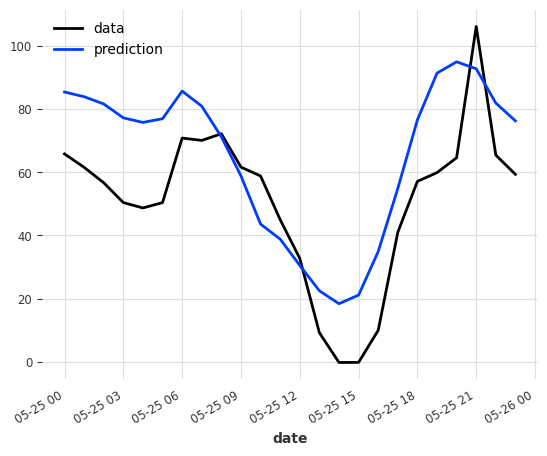

In [78]:
series2.plot(label="data")
pred.plot(label="prediction")
print("RMSE = {:.2f}%".format(rmse(pred, series2)))

In [67]:
pred.pd_dataframe()

component,price
date,
2023-05-25 00:00:00,85.356827
2023-05-25 01:00:00,83.871542
2023-05-25 02:00:00,81.581312
2023-05-25 03:00:00,77.187276
2023-05-25 04:00:00,75.746504
2023-05-25 05:00:00,76.920037
2023-05-25 06:00:00,85.646993
2023-05-25 07:00:00,80.881750
2023-05-25 08:00:00,71.185562


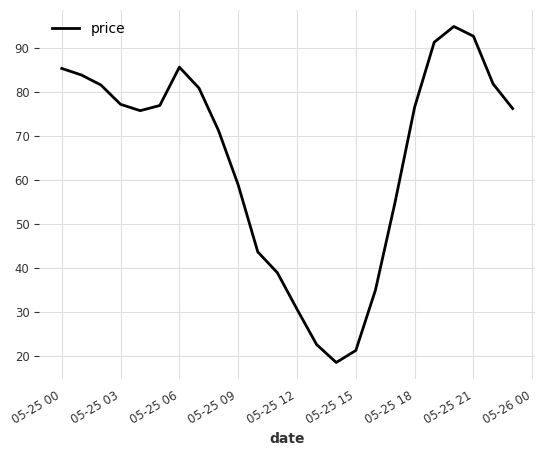

In [68]:
pred.plot()